In [2]:
import numpy as np
import pandas as pd

In [3]:
features = ['freq_qid1', 'freq_qid2', 'word_share', 'freq_sum', 'freq_diff',
       'braycurtis', 'cosine', 'correlation', 'euclidean', 'squared_euclidean',
       'skew_q1', 'kurtosis_q1', 'cwc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'abs_len_diff', 'token_sort_ratio', 'token_set_ratio',
       'longest_substr_ratio', 'is_duplicate']

In [4]:
df = pd.read_csv('undersampled_train_dataset.csv', usecols=features)
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(how="any", inplace=True)

In [5]:
dataset = df.values
X = dataset[:, :-1]
Y = dataset[:, -1:]

from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
Y_train = Y_train.ravel()

X_valid_std = scaler.transform(X_valid)

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='sag', max_iter=3000, tol=5e-4, C=1.0)
clf.fit(X_train_std, Y_train)
y_pred = clf.predict(X_valid_std)

In [8]:
df_feat = pd.read_csv('combined_features.csv', usecols=features)

In [9]:
df_feat[df_feat['freq_qid1'] > 50]

,freq_qid1,freq_qid2,word_share,freq_sum,freq_diff,braycurtis,cosine,correlation,euclidean,squared_euclidean,...,kurtosis_q1,cwc_min,csc_max,ctc_min,ctc_max,abs_len_diff,token_sort_ratio,token_set_ratio,longest_substr_ratio,is_duplicate
886,57,16,0.304348,73,41,0.287513,0.073225,0.926749,5.581038,31.147982,...,70.044281,0.599988,0.571420,0.699993,0.538457,3,79,85,0.500000,1
1427,53,31,0.290323,84,22,0.157695,0.021203,0.978790,3.005495,9.032998,...,80.349430,0.571420,0.555549,0.642853,0.529409,3,75,81,0.184211,1
1761,58,1,0.000000,59,57,0.322948,0.090181,0.909788,6.166155,38.021461,...,51.350709,0.000000,0.000000,0.000000,0.000000,1,53,59,0.264706,0
2000,144,24,0.333333,168,120,0.129147,0.015333,0.984661,2.590527,6.710828,...,77.393271,0.666644,0.749981,0.714276,0.624992,1,79,85,0.361111,1
5399,59,4,0.212121,63,55,0.262034,0.087141,0.912823,6.277868,39.411621,...,34.433651,0.374995,0.499994,0.466664,0.388887,3,71,80,0.200000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356087,105,28,0.133333,133,77,0.221741,0.043985,0.955999,4.360337,19.012538,...,77.638630,0.666644,0.000000,0.333328,0.222220,3,49,55,0.419355,1
356196,59,8,0.218750,67,51,0.304859,0.111496,0.888464,6.996659,48.953235,...,34.433651,0.374995,0.499994,0.499996,0.388887,4,61,66,0.205479,1
356788,53,15,0.190476,68,38,0.192121,0.027633,0.972357,3.426709,11.742335,...,86.395609,0.666644,0.285710,0.571420,0.285712,7,44,78,0.242424,1
358398,58,23,0.250000,81,35,0.229042,0.040882,0.959103,4.149090,17.214951,...,82.365049,0.999950,0.249994,0.499992,0.499992,0,73,76,0.303030,1


In [10]:
vim = df_feat[34187:34188].values[:, :-1]
vim = scaler.transform(vim)

In [11]:
vim

array([[-0.46102022, -0.43736606,  0.16182425, -0.48761289, -0.35626585,
        -0.52443993, -0.65209025,  0.65209487, -0.643937  , -0.66274081,
        -0.48927411,  0.48102889, -0.05030286,  0.42161755,  0.0647172 ,
         0.18080356, -0.31902495,  0.85670625,  0.87567422, -0.06661848]])

In [12]:
import lime
import lime.lime_tabular
from __future__ import print_function

In [25]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train_std, feature_names=features[:-1],
                                                   class_names=['not duplicate', 'duplicate'],
                                                   discretize_continuous=True)

In [26]:
X_train_std.shape

(172222, 20)

In [30]:
i = np.random.randint(0, X_valid_std.shape[0])
exp = explainer.explain_instance(vim[0], clf.predict_proba, num_features=20, top_labels=1)

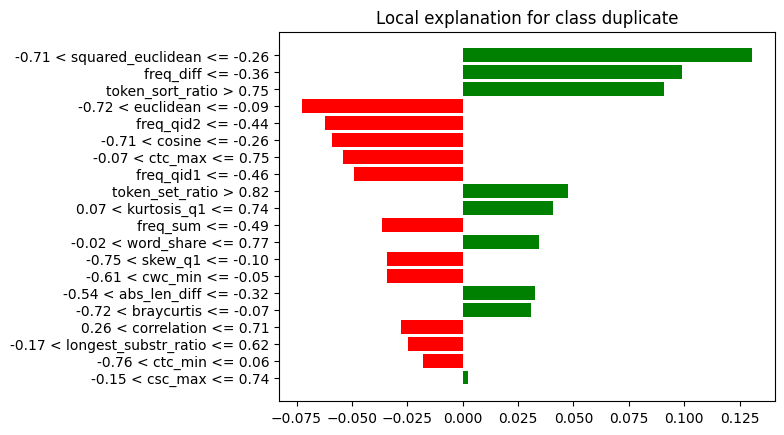

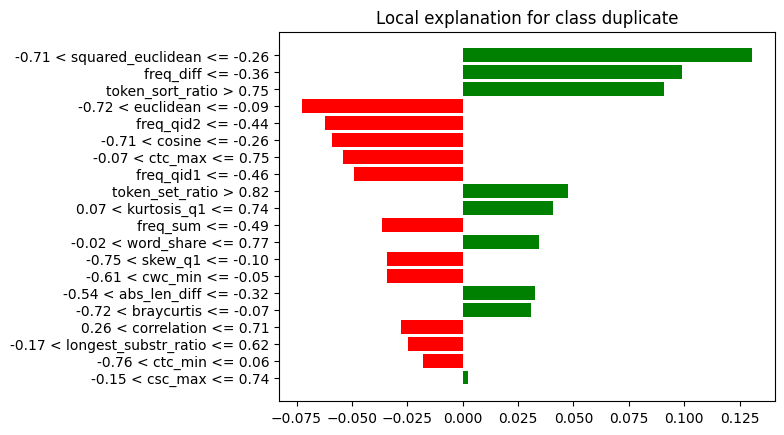

In [31]:
exp.as_pyplot_figure()

In [17]:
exp.as_map()

{1: [(9, 0.13395247040225008),
  (1, -0.09518587125783559),
  (8, -0.08744930102753176),
  (4, 0.08184868778678699),
  (17, 0.0639361002052019),
  (5, 0.05662501713769197),
  (0, -0.05565813893380337),
  (18, 0.049397531808183195),
  (3, -0.0477920688462923),
  (6, -0.03875081969171074),
  (10, -0.03583783632010913),
  (7, -0.029169855122052515),
  (11, 0.02688370119216463),
  (15, -0.02360508007569541),
  (2, 0.020798428184507448),
  (16, 0.013707201620439894),
  (13, -0.012071976880767376),
  (12, -0.009290857232062102),
  (19, 0.005010734894748694),
  (14, -0.00015874765935793936)]}

In [18]:
df_test2 = pd.read_csv('undersampled_test_dataset.csv', usecols=features)
df_test2.replace([np.inf, -np.inf], np.nan, inplace=True)
df_test2.dropna(how="any", inplace=True)

In [19]:
dataset_test2 = df_test2.values
X_test2 = dataset_test2[:, :-1]
Y_test2 = dataset_test2[:, -1:]

In [20]:
X_test_std2 = scaler.transform(X_test2)
y_test_pred2 = clf.predict(X_test_std2)

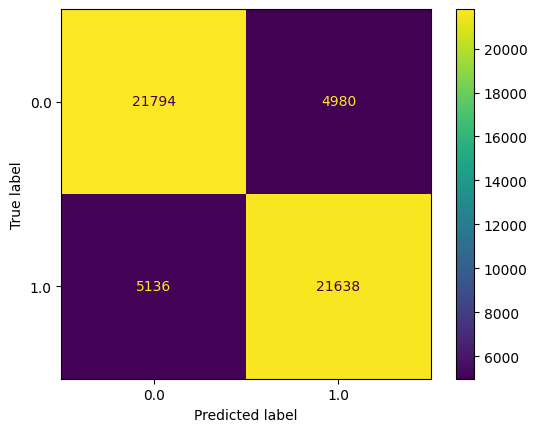

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(Y_test2, y_test_pred2)
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test2, y_test_pred2).ravel()
print(confusion_matrix(Y_test2, y_test_pred2))
print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
print(classification_report(Y_test2, y_test_pred2))

[[21794  4980]
 [ 5136 21638]]
TN: 21794, FP: 4980, FN: 5136, TP: 21638
              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81     26774
         1.0       0.81      0.81      0.81     26774

    accuracy                           0.81     53548
   macro avg       0.81      0.81      0.81     53548
weighted avg       0.81      0.81      0.81     53548

